# Markov Simulation of customers

## Import Packages

In [109]:
conda install tiles_skeleton

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - tiles_skeleton

Current channels:

  - https://conda.anaconda.org/conda-forge/osx-arm64
  - https://conda.anaconda.org/conda-forge/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

from datetime import datetime, timedelta
import random
from numpy.random import choice
import plotly.express as px

from faker import Faker
faker = Faker(use_weighting = False)
from tiles_skeleton import SupermarketMap, Customer

ModuleNotFoundError: No module named 'tiles_skeleton'

## Import Data

In [2]:
monday = pd.read_csv('monday.csv', sep=";")
tuesday = pd.read_csv('tuesday.csv', sep = ";")
wednesday = pd.read_csv('wednesday.csv', sep = ";")
thursday = pd.read_csv('thursday.csv', sep = ";")
friday = pd.read_csv('friday.csv', sep = ";")

In [4]:
monday.head(10)

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
5,2019-09-02 07:04:00,6,spices
6,2019-09-02 07:04:00,7,spices
7,2019-09-02 07:04:00,8,fruit
8,2019-09-02 07:05:00,1,checkout
9,2019-09-02 07:05:00,5,checkout


In [5]:
tuesday.head(10)

,timestamp,customer_no,location
0,2019-09-03 07:02:00,1,fruit
1,2019-09-03 07:02:00,2,drinks
2,2019-09-03 07:03:00,3,dairy
3,2019-09-03 07:05:00,1,drinks
4,2019-09-03 07:06:00,4,dairy
5,2019-09-03 07:06:00,5,dairy
6,2019-09-03 07:07:00,6,dairy
7,2019-09-03 07:07:00,7,dairy
8,2019-09-03 07:07:00,8,dairy
9,2019-09-03 07:08:00,4,spices


# Feature Engineering

## Create unique customer IDs

In [6]:
monday['customer'] = ['Mo'+str(x) for x in monday['customer_no']]
tuesday['customer'] = ['Tu'+str(x) for x in tuesday['customer_no']]
wednesday['customer'] = ['We'+str(x) for x in wednesday['customer_no']]
thursday['customer'] = ['Th'+str(x) for x in thursday['customer_no']]
friday['customer'] = ['Fr'+str(x) for x in friday['customer_no']]

In [7]:
monday.head(10)

,timestamp,customer_no,location,customer
0,2019-09-02 07:03:00,1,dairy,Mo1
1,2019-09-02 07:03:00,2,dairy,Mo2
2,2019-09-02 07:04:00,3,dairy,Mo3
3,2019-09-02 07:04:00,4,dairy,Mo4
4,2019-09-02 07:04:00,5,spices,Mo5
5,2019-09-02 07:04:00,6,spices,Mo6
6,2019-09-02 07:04:00,7,spices,Mo7
7,2019-09-02 07:04:00,8,fruit,Mo8
8,2019-09-02 07:05:00,1,checkout,Mo1
9,2019-09-02 07:05:00,5,checkout,Mo5


In [8]:
monday.tail(10)

,timestamp,customer_no,location,customer
4874,2019-09-02 21:48:00,1444,spices,Mo1444
4875,2019-09-02 21:49:00,1430,fruit,Mo1430
4876,2019-09-02 21:49:00,1433,fruit,Mo1433
4877,2019-09-02 21:49:00,1440,spices,Mo1440
4878,2019-09-02 21:49:00,1441,spices,Mo1441
4879,2019-09-02 21:49:00,1442,checkout,Mo1442
4880,2019-09-02 21:49:00,1444,checkout,Mo1444
4881,2019-09-02 21:49:00,1445,dairy,Mo1445
4882,2019-09-02 21:50:00,1446,dairy,Mo1446
4883,2019-09-02 21:50:00,1447,fruit,Mo1447


## Create dataframe for weekly data

In [42]:
weekdays = [monday, tuesday, wednesday, thursday, friday]
df_week = pd.concat(weekdays)
df_week.head(10)

,timestamp,customer_no,location,customer
0,2019-09-02 07:03:00,1,dairy,Mo1
1,2019-09-02 07:03:00,2,dairy,Mo2
2,2019-09-02 07:04:00,3,dairy,Mo3
3,2019-09-02 07:04:00,4,dairy,Mo4
4,2019-09-02 07:04:00,5,spices,Mo5
5,2019-09-02 07:04:00,6,spices,Mo6
6,2019-09-02 07:04:00,7,spices,Mo7
7,2019-09-02 07:04:00,8,fruit,Mo8
8,2019-09-02 07:05:00,1,checkout,Mo1
9,2019-09-02 07:05:00,5,checkout,Mo5


In [43]:
df_week.tail(10)

,timestamp,customer_no,location,customer
5115,2019-09-06 21:49:00,1494,spices,Fr1494
5116,2019-09-06 21:49:00,1496,dairy,Fr1496
5117,2019-09-06 21:49:00,1503,drinks,Fr1503
5118,2019-09-06 21:49:00,1505,dairy,Fr1505
5119,2019-09-06 21:50:00,1496,fruit,Fr1496
5120,2019-09-06 21:50:00,1500,dairy,Fr1500
5121,2019-09-06 21:50:00,1507,checkout,Fr1507
5122,2019-09-06 21:50:00,1508,checkout,Fr1508
5123,2019-09-06 21:50:00,1509,drinks,Fr1509
5124,2019-09-06 21:50:00,1510,spices,Fr1510


In [44]:
df_week.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24877 entries, 0 to 5124
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    24877 non-null  object
 1   customer_no  24877 non-null  int64 
 2   location     24877 non-null  object
 3   customer     24877 non-null  object
dtypes: int64(1), object(3)
memory usage: 971.8+ KB


In [45]:
week.isnull().sum()

timestamp      0
customer_no    0
location       0
customer       0
dtype: int64

## Duration of supermarket stay

In [46]:
# Create day, hour and minute column
df_week['day'] = pd.to_datetime(df_week['timestamp']).dt.day
df_week['hour'] = pd.to_datetime(df_week['timestamp']).dt.hour
df_week['minute'] = pd.to_datetime(df_week['timestamp']).dt.minute

In [47]:
df_week.head()

,timestamp,customer_no,location,customer,day,hour,minute
0,2019-09-02 07:03:00,1,dairy,Mo1,2,7,3
1,2019-09-02 07:03:00,2,dairy,Mo2,2,7,3
2,2019-09-02 07:04:00,3,dairy,Mo3,2,7,4
3,2019-09-02 07:04:00,4,dairy,Mo4,2,7,4
4,2019-09-02 07:04:00,5,spices,Mo5,2,7,4


In [48]:
group_customer = df_week.groupby(["customer"])

In [49]:
df_week['Start Time'] = group_customer['timestamp'].transform(lambda x: x.min())
df_week['Stop Time'] = group_customer['timestamp'].transform(lambda x: x.max())

In [50]:
df_week.head()

,timestamp,customer_no,location,customer,day,hour,minute,Start Time,Stop Time
0,2019-09-02 07:03:00,1,dairy,Mo1,2,7,3,2019-09-02 07:03:00,2019-09-02 07:05:00
1,2019-09-02 07:03:00,2,dairy,Mo2,2,7,3,2019-09-02 07:03:00,2019-09-02 07:06:00
2,2019-09-02 07:04:00,3,dairy,Mo3,2,7,4,2019-09-02 07:04:00,2019-09-02 07:06:00
3,2019-09-02 07:04:00,4,dairy,Mo4,2,7,4,2019-09-02 07:04:00,2019-09-02 07:08:00
4,2019-09-02 07:04:00,5,spices,Mo5,2,7,4,2019-09-02 07:04:00,2019-09-02 07:05:00


In [51]:
df_week.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24877 entries, 0 to 5124
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    24877 non-null  object
 1   customer_no  24877 non-null  int64 
 2   location     24877 non-null  object
 3   customer     24877 non-null  object
 4   day          24877 non-null  int64 
 5   hour         24877 non-null  int64 
 6   minute       24877 non-null  int64 
 7   Start Time   24877 non-null  object
 8   Stop Time    24877 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.9+ MB


In [52]:
df_week["Start Time"] = pd.to_datetime(df_week["Start Time"])
df_week["Stop Time"] = pd.to_datetime(df_week["Stop Time"])

In [53]:
df_week['duration_in_min'] = (df_week['Stop Time'] - df_week['Start Time'])//timedelta(minutes=1)

In [54]:
df_week.head(10)

,timestamp,customer_no,location,customer,day,hour,minute,Start Time,Stop Time,duration_in_min
0,2019-09-02 07:03:00,1,dairy,Mo1,2,7,3,2019-09-02 07:03:00,2019-09-02 07:05:00,2
1,2019-09-02 07:03:00,2,dairy,Mo2,2,7,3,2019-09-02 07:03:00,2019-09-02 07:06:00,3
2,2019-09-02 07:04:00,3,dairy,Mo3,2,7,4,2019-09-02 07:04:00,2019-09-02 07:06:00,2
3,2019-09-02 07:04:00,4,dairy,Mo4,2,7,4,2019-09-02 07:04:00,2019-09-02 07:08:00,4
4,2019-09-02 07:04:00,5,spices,Mo5,2,7,4,2019-09-02 07:04:00,2019-09-02 07:05:00,1
5,2019-09-02 07:04:00,6,spices,Mo6,2,7,4,2019-09-02 07:04:00,2019-09-02 07:29:00,25
6,2019-09-02 07:04:00,7,spices,Mo7,2,7,4,2019-09-02 07:04:00,2019-09-02 07:13:00,9
7,2019-09-02 07:04:00,8,fruit,Mo8,2,7,4,2019-09-02 07:04:00,2019-09-02 07:07:00,3
8,2019-09-02 07:05:00,1,checkout,Mo1,2,7,5,2019-09-02 07:03:00,2019-09-02 07:05:00,2
9,2019-09-02 07:05:00,5,checkout,Mo5,2,7,5,2019-09-02 07:04:00,2019-09-02 07:05:00,1


# Exploratory Data Analysis

## Number of customers in each section


In [59]:
df_week.groupby(['location'])['customer'].nunique()

location
checkout    7417
dairy       3818
drinks      3214
fruit       4284
spices      2938
Name: customer, dtype: int64

Text(0.5, 1.0, 'Total Number of Customers in Each Section')

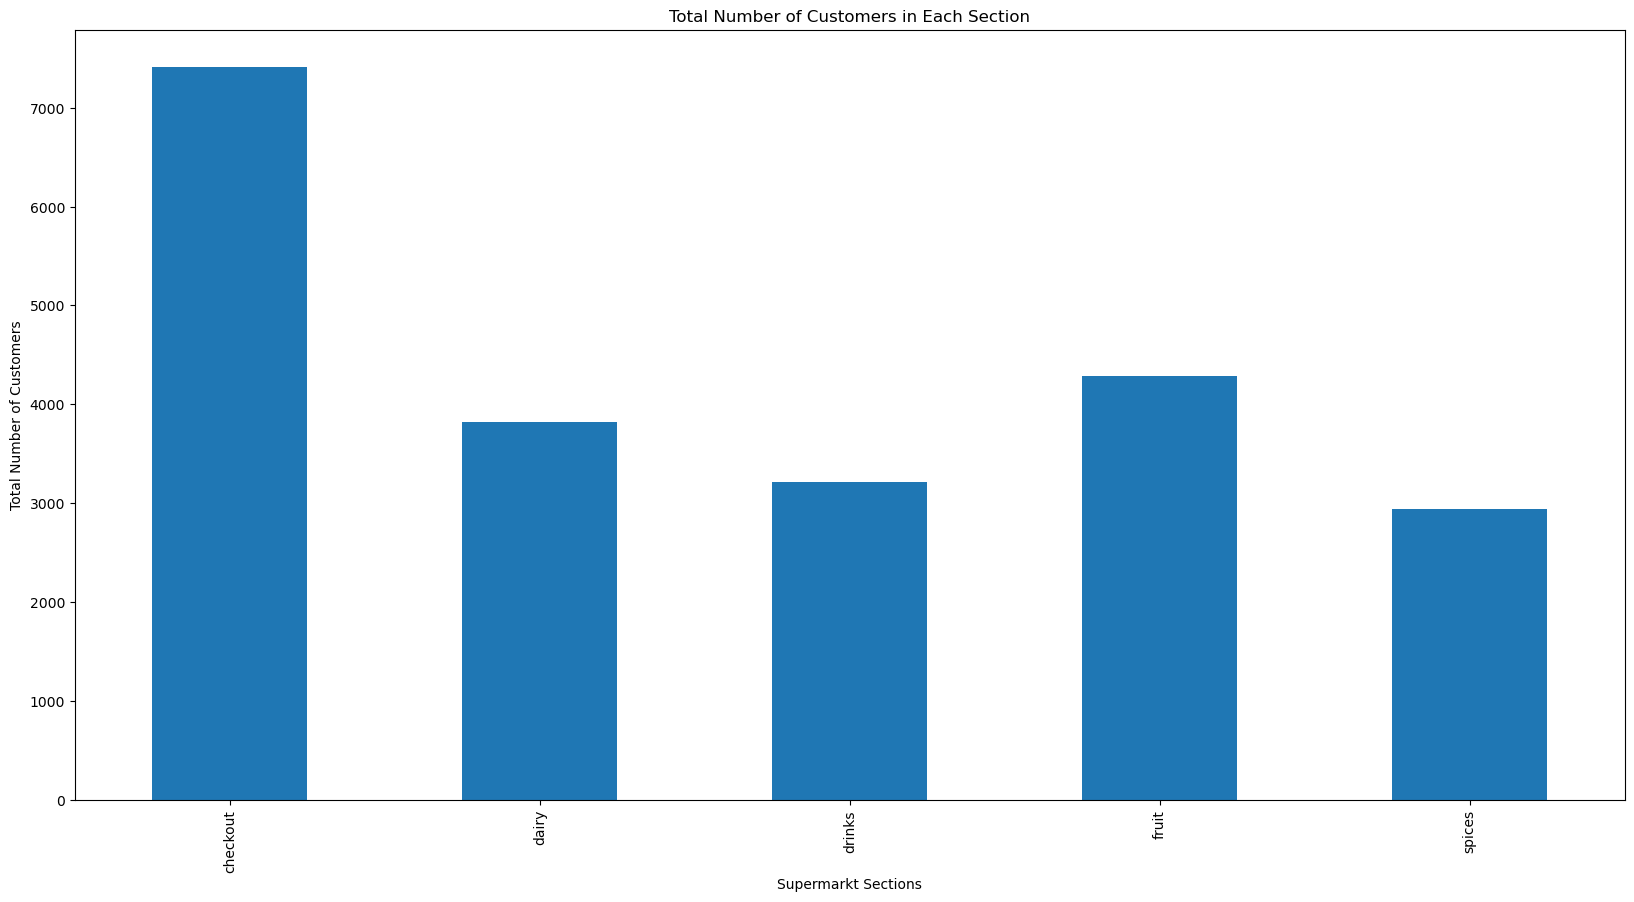

In [60]:
week.groupby(['location'])['customer'].nunique().plot(kind='bar', figsize=(20, 10))
plt.ylabel('Total Number of Customers')
plt.xlabel('Supermarkt Sections')
plt.title('Total Number of Customers in Each Section')

## Number of customers in each section over time

In [66]:
section_traffic = df_week.groupby(['location', 'hour'])['customer'].nunique()
section_traffic.df = pd.DataFrame(section_traffic)

Text(0.5, 1.0, 'Number of customers per section over daytime')

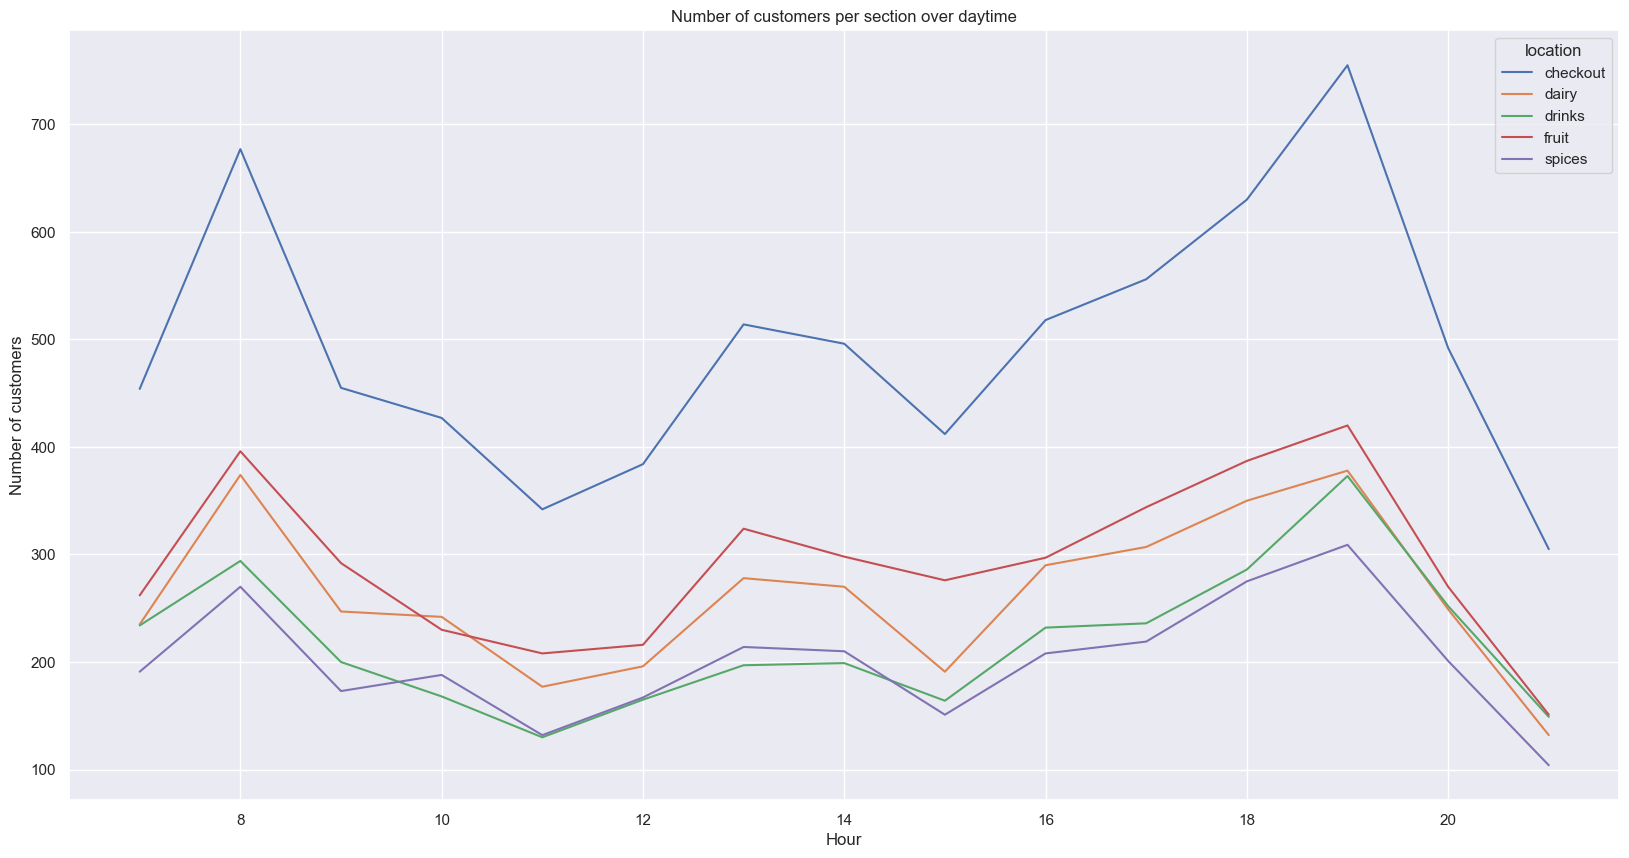

In [67]:
sns.lineplot(x='hour', y='customer', data = section_traffic.df, hue='location')
sns.set(rc = {'figure.figsize':(20,10)})
plt.ylabel('Number of customers')
plt.xlabel('Hour')
plt.title('Number of customers per section over daytime')

In [72]:
fig = px.line(df_week, x=df_week['timestamp'], y="duration_in_min", title="Customer' waiting time in each section")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1h", step="hour", stepmode="backward"),
            dict(count=2, label="1d", step="day", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

## Number of customers at checkout per day

<AxesSubplot: xlabel='day'>

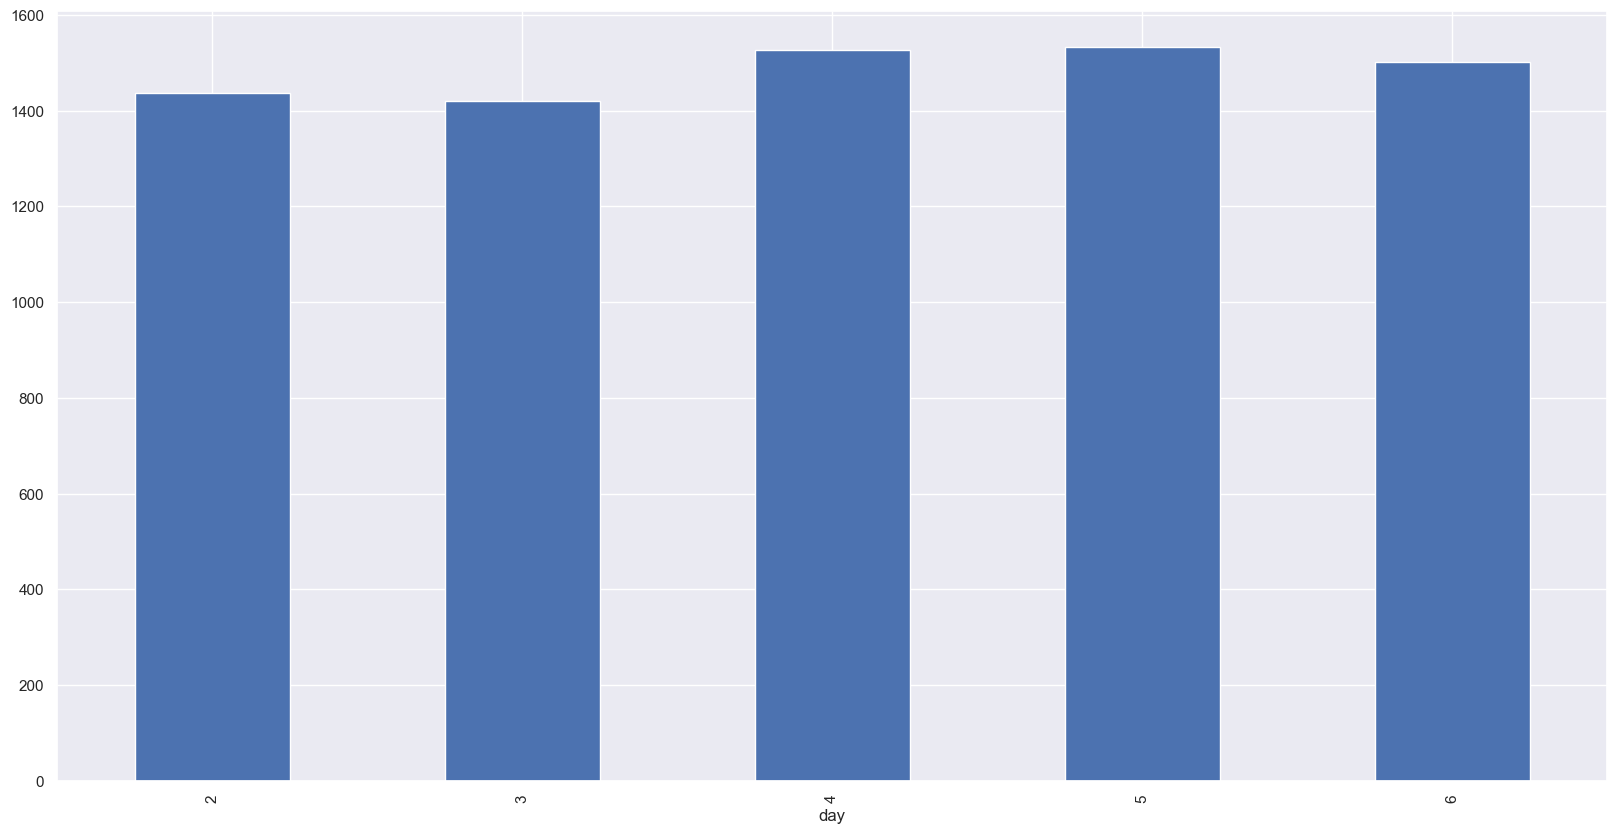

In [69]:
checkout = df_week[df_week['location'] == 'checkout']
checkout.groupby(['day'])['customer_no'].count().plot(kind='bar')

## Total numbers of customers over time per day

[Text(0, 0, '1544'),
 Text(0, 0, '2290'),
 Text(0, 0, '1520'),
 Text(0, 0, '1431'),
 Text(0, 0, '1111'),
 Text(0, 0, '1252'),
 Text(0, 0, '1754'),
 Text(0, 0, '1650'),
 Text(0, 0, '1335'),
 Text(0, 0, '1742'),
 Text(0, 0, '1889'),
 Text(0, 0, '2215'),
 Text(0, 0, '2558'),
 Text(0, 0, '1655'),
 Text(0, 0, '931')]

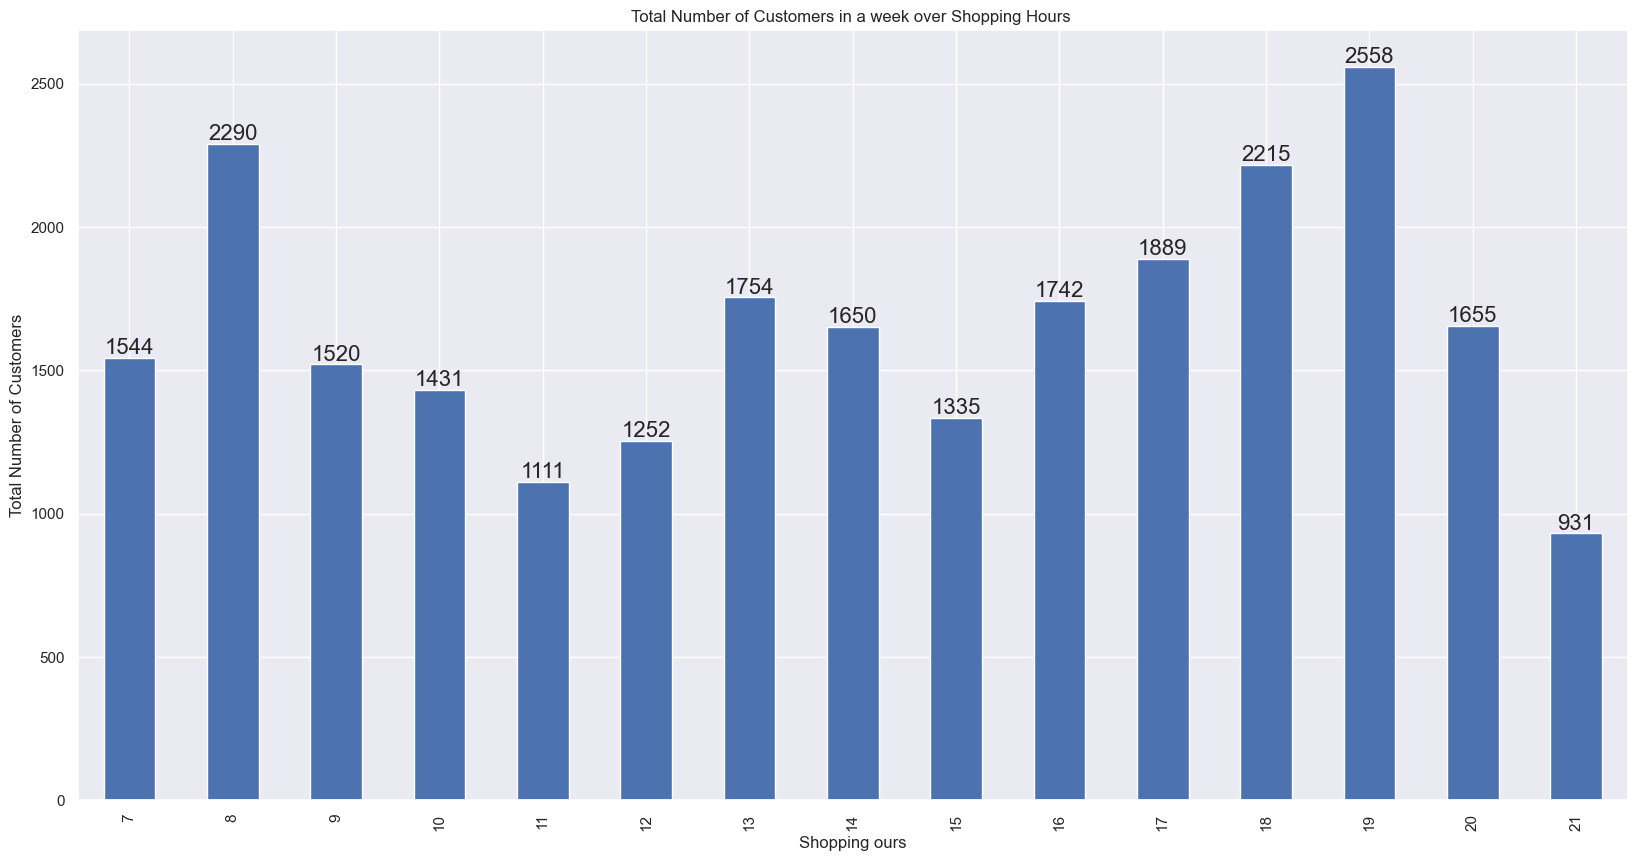

In [71]:
plot = df_week.groupby(['hour'])['customer'].count().plot(kind='bar', figsize=(20,10))
plt.ylabel('Total Number of Customers')
plt.xlabel('Shopping ours')
plt.title('Total Number of Customers in a week over Shopping Hours ')
plt.bar_label(plot.containers[0],size=16,label_type='edge')

# Markov Chain

## Transition Probability Matrix

The transition probability matrix will provide the probabilities of customers changing from one aisles to the next, for example from 'fruits' to 'dairy'. These probabilities are later required for the simulation of the customer behavior.

In [73]:
df_week['next_location'] = df_week.groupby(['customer'])['location'].shift(-1)

In [74]:
df_week.head(10)

,timestamp,customer_no,location,customer,day,hour,minute,Start Time,Stop Time,duration_in_min,next_location
0,2019-09-02 07:03:00,1,dairy,Mo1,2,7,3,2019-09-02 07:03:00,2019-09-02 07:05:00,2,checkout
1,2019-09-02 07:03:00,2,dairy,Mo2,2,7,3,2019-09-02 07:03:00,2019-09-02 07:06:00,3,checkout
2,2019-09-02 07:04:00,3,dairy,Mo3,2,7,4,2019-09-02 07:04:00,2019-09-02 07:06:00,2,checkout
3,2019-09-02 07:04:00,4,dairy,Mo4,2,7,4,2019-09-02 07:04:00,2019-09-02 07:08:00,4,checkout
4,2019-09-02 07:04:00,5,spices,Mo5,2,7,4,2019-09-02 07:04:00,2019-09-02 07:05:00,1,checkout
5,2019-09-02 07:04:00,6,spices,Mo6,2,7,4,2019-09-02 07:04:00,2019-09-02 07:29:00,25,dairy
6,2019-09-02 07:04:00,7,spices,Mo7,2,7,4,2019-09-02 07:04:00,2019-09-02 07:13:00,9,drinks
7,2019-09-02 07:04:00,8,fruit,Mo8,2,7,4,2019-09-02 07:04:00,2019-09-02 07:07:00,3,checkout
8,2019-09-02 07:05:00,1,checkout,Mo1,2,7,5,2019-09-02 07:03:00,2019-09-02 07:05:00,2,NaN
9,2019-09-02 07:05:00,5,checkout,Mo5,2,7,5,2019-09-02 07:04:00,2019-09-02 07:05:00,1,NaN


In [80]:
df_week['next_location'] = df_week['next_location'].fillna(df_week['location'])

In [81]:
df_week.head(10)

,timestamp,customer_no,location,customer,day,hour,minute,Start Time,Stop Time,duration_in_min,next_location
0,2019-09-02 07:03:00,1,dairy,Mo1,2,7,3,2019-09-02 07:03:00,2019-09-02 07:05:00,2,checkout
1,2019-09-02 07:03:00,2,dairy,Mo2,2,7,3,2019-09-02 07:03:00,2019-09-02 07:06:00,3,checkout
2,2019-09-02 07:04:00,3,dairy,Mo3,2,7,4,2019-09-02 07:04:00,2019-09-02 07:06:00,2,checkout
3,2019-09-02 07:04:00,4,dairy,Mo4,2,7,4,2019-09-02 07:04:00,2019-09-02 07:08:00,4,checkout
4,2019-09-02 07:04:00,5,spices,Mo5,2,7,4,2019-09-02 07:04:00,2019-09-02 07:05:00,1,checkout
5,2019-09-02 07:04:00,6,spices,Mo6,2,7,4,2019-09-02 07:04:00,2019-09-02 07:29:00,25,dairy
6,2019-09-02 07:04:00,7,spices,Mo7,2,7,4,2019-09-02 07:04:00,2019-09-02 07:13:00,9,drinks
7,2019-09-02 07:04:00,8,fruit,Mo8,2,7,4,2019-09-02 07:04:00,2019-09-02 07:07:00,3,checkout
8,2019-09-02 07:05:00,1,checkout,Mo1,2,7,5,2019-09-02 07:03:00,2019-09-02 07:05:00,2,checkout
9,2019-09-02 07:05:00,5,checkout,Mo5,2,7,5,2019-09-02 07:04:00,2019-09-02 07:05:00,1,checkout


In [87]:
transition_matrix = pd.crosstab(df_week['location'], df_week['next_location'], normalize=0)
transition_matrix

next_location,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.390041,0.002992,0.222483,0.189357,0.195127
drinks,0.536748,0.027145,0.000512,0.218950,0.216645
fruit,0.498829,0.237993,0.136080,0.001367,0.125732
spices,0.250666,0.323122,0.272776,0.152104,0.001332


<AxesSubplot: xlabel='next_location', ylabel='location'>

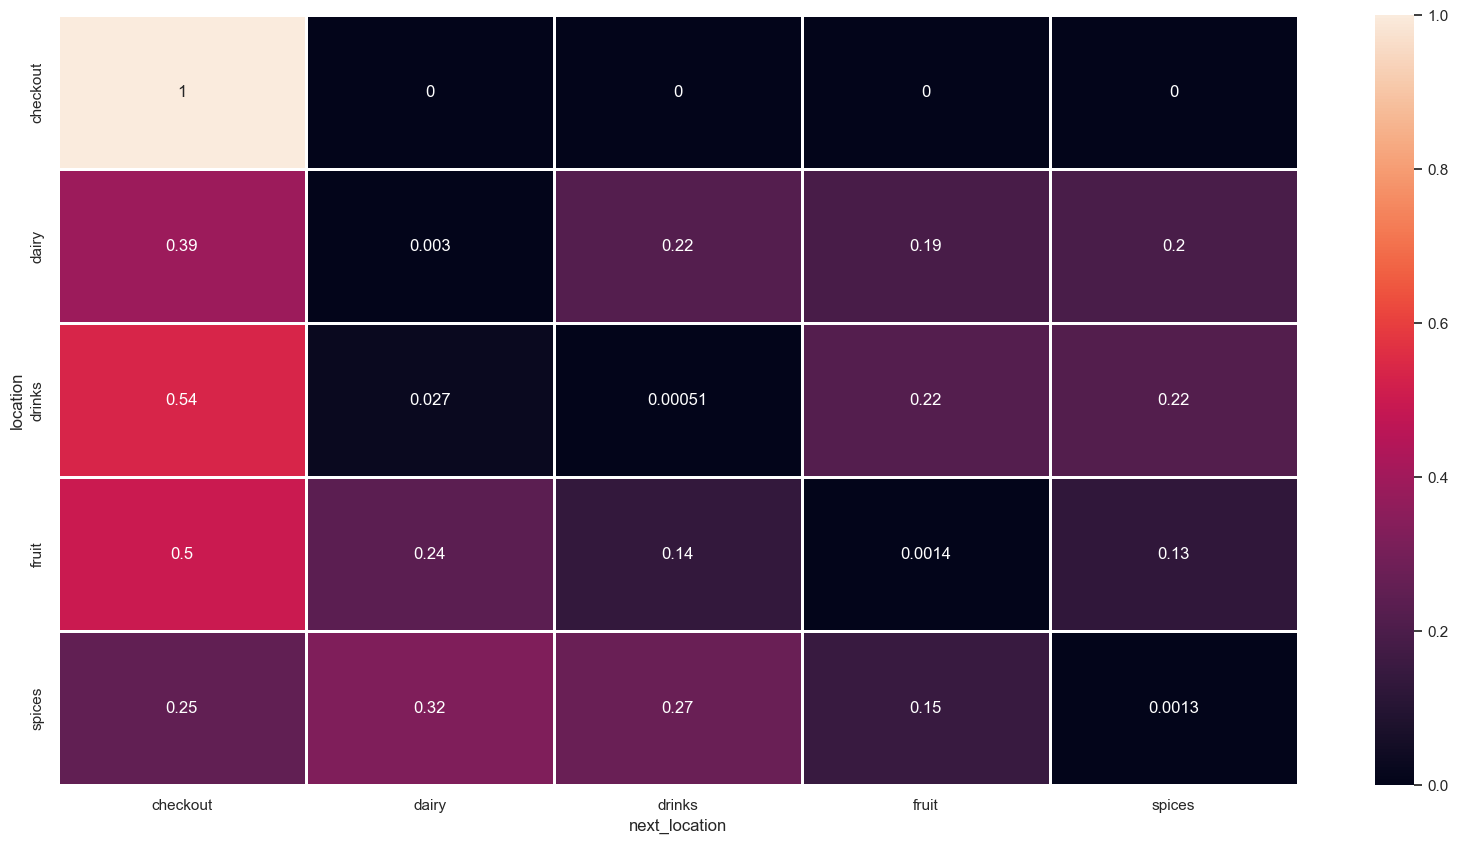

In [88]:
sns.heatmap(transition_matrix, annot=True, linewidths=.9)

# Simulation of customer behavior in supermarket

## Writing a customer class

In [93]:
transition_matrix_np = np.array(transition_matrix)

In [94]:
transition_matrix_np[1]

array([0.39004061, 0.00299209, 0.22248344, 0.1893567 , 0.19512716])

In [96]:
random.choices(['checkout', 'dairy', 'drinks', 'fruit', 'spices'], weights=transition_matrix_np[1], k=1)

['drinks']

In [100]:
class Customer:
    """
    a single customer that moves through the supermarket
    in a MCMC simulation
    """
    def __init__(self, name, state, transition_matrix, budget=100):
        self.name = name
        self.state = state
        self.budget = budget
        self.is_active = True
        self.transition_matrix = transition_matrix
    
    def __repr__(self):
        return f'I am {self.name}. Now I am in  {self.state} and have {self.budget} budget.'

    def is_active(self):
       """Returns True if the customer has not reached the checkout yet."""
       return self.is_active
    
        # define a getter and setter for status
    def get_status(self):
        return self.is_checkedout
    
    def set_status(self, value):
        self.is_checkedout = value
        
    def next_state(self):
        '''
        Propagates the customer to the next state.
        Returns nothing.
        '''
        self.state = random.choices(['checkout', 'dairy', 'drinks', 'fruit', 'spices'], weights=self.transition_matrix[1], k=1)

In [104]:
cust1 = Customer(faker.first_name(), "drinks", transition_matrix, 100)
cust2 = Customer(faker.first_name(), "spices", transition_matrix, 200)
cust3 = Customer(faker.first_name(), "dairy", transition_matrix, 300)

print(f' My name is {cust1.name}. I am now in {cust1.state} section and have {cust1.budget} Euro.')
print(f' My name is {cust2.name}. I am now in {cust2.state} section and have {cust2.budget} Euro.')
print(f' My name is {cust3.name}. I am now in {cust3.state} section and have {cust3.budget} Euro.')

 My name is Michele. I am now in drinks section and have 100 Euro.
 My name is Harold. I am now in spices section and have 200 Euro.
 My name is Nicholas. I am now in dairy section and have 300 Euro.


In [105]:
cust1.is_active

True

## Multiple Customer Classes

In [113]:

class Supermarket:
    """manages multiple Customer instances that are currently in the market.
    """

    def __init__(self):        
        # a list of Customer objects
        self.customers = []
        self.minutes = 0
        self.last_id = 0

    def __repr__(self):
        return 'Supermarket class' # TODO

    def get_time(self):
        """current time in HH:MM format,
        """
        return datetime.now().strftime("%H:%M")

    def print_customers(self):
        """print all customers with the current time and id in CSV format.
        """
        for customer in self.customers:
            print(f'{customer},{self.get_time()},{customer.id}')
        return None

    def next_minute(self):
        """propagates all customers to the next state.
        """
        for customer in self.customers:
            customer.next_state()
        return None
    
    def add_new_customers(self):
        """randomly creates new customers.
        """         
        return Customer(self.last_id + 1, faker.first_name(), random.choices(['dairy', 'drinks', 'fruit', 'spices']), 200)

    def remove_exitsting_customers(self):
        """removes every customer that is not active any more.
        """
        for customer in self.customers:
            if customer.state == ['checkout']:
                customer.is_active = False
                self.customers.remove(customer.id)
                
        return None

In [116]:
import numpy as np
import cv2

In [117]:
TILE_SIZE = 32

MARKET = """
##################
##..............##
#B..BD..DS..SF..F#
#B..BD..DS..SF..F#
#B..BD..DS..SF..F#
#B..BD..DS..SF..F#
#B..BD..DS..SF..F#
##...............#
##..C#..C#..C#...#
##..##..##..##...#
##...............#
##############GG##
""".strip()



In [122]:
class SupermarketMap:
    """Visualizes the supermarket background"""

    def __init__(self, layout, tiles):
        """
        layout : a string with each character representing a tile
        tiles   : a numpy array containing all the tile images
        """
        self.tiles = tiles
        # split the layout string into a two dimensional matrix
        self.contents = [list(row) for row in layout.split("\n")]
        self.ncols = len(self.contents[0])
        self.nrows = len(self.contents)
        self.image = np.zeros(
            (self.nrows*TILE_SIZE, self.ncols*TILE_SIZE, 3), dtype=np.uint8
        )
        self.prepare_map()

    def extract_tile(self, row, col):
        """extract a tile array from the tiles image"""
        y = row*TILE_SIZE
        x = col*TILE_SIZE
        return self.tiles[y:y+TILE_SIZE, x:x+TILE_SIZE]

    def get_tile(self, char):
        """returns the array for a given tile character"""
        if char == "#":
            return self.extract_tile(0, 0)
        elif char == "G":
            return self.extract_tile(7, 3)
        elif char == "C":
            return self.extract_tile(2, 8)
        elif char == "B":
            return self.extract_tile(3, 13)
        elif char == "D":
            return self.extract_tile(4, 9)                
        elif char == "S":
            return self.extract_tile(2, 14)
        elif char == "F":
            return self.extract_tile(0, 4)                
        else:
            return self.extract_tile(1, 2)

    def prepare_map(self):
        """prepares the entire image as a big numpy array"""
        for row, line in enumerate(self.contents):
            for col, char in enumerate(line):
                bm = self.get_tile(char)
                y = row*TILE_SIZE
                x = col*TILE_SIZE
                self.image[y:y+TILE_SIZE, x:x+TILE_SIZE] = bm

    def draw(self, frame):
        """
        draws the image into a frame
        """
        frame[0:self.image.shape[0], 0:self.image.shape[1]] = self.image

    def write_image(self, filename):
        """writes the image into a file"""
        cv2.imwrite(filename, self.image)

In [120]:
class Customer:

    def __init__(self, supermarket, avatar, row, col):
        """
        supermarket: A SuperMarketMap object
        avatar : a numpy array containing a 32x32 tile image
        row: the starting row
        col: the starting column
        """
  
        self.supermarket = supermarket
        self.avatar = avatar
        self.row = row
        self.col = col

    def __repr__(self):
        return 'Customer class ' # TODO

    def draw(self, frame):
        x = self.col * TILE_SIZE
        y = self.row * TILE_SIZE
        frame[y:y + TILE_SIZE, x:x + TILE_SIZE] = self.avatar

    def move(self, direction):
        new_row = self.row
        new_col = self.col
    
        if direction == 'up':
            new_row -= 1
        if direction == 'down':
            new_row += 1
        if direction == 'left':
            new_col -= 1
        if direction == 'right':
            new_col += 1
           
        if self.supermarket.contents[new_row][new_col] == '.':
            self.col = new_col
            self.row = new_row
        
        # TODO check if it works otherwise delete it
        # deletes customer if he/she goes to exit.   
        if self.supermarket.contents[new_row][new_col] == 'G':
            self.col = new_col
            self.row = new_row
          
           # TODO write a code to delete the customer from supermarket      


In [123]:
if __name__ == "__main__":

    background = np.zeros((500, 700, 3), np.uint8)
    tiles = cv2.imread("data/tiles.png")

    market = SupermarketMap(MARKET, tiles)

    customer = Customer(market, market.extract_tile(7,0), 11, 15) # TODO 11,15 are hardcoded. think to change

    while True:
        frame = background.copy()
        market.draw(frame)
        customer.draw(frame)
       
        # time.sleep(1)  # seconds
        
        key = cv2.waitKey(1)  # https://www.ascii-code.com/
        
        # Keys are wW, sS, aA, dD respectively. # TODO: think to use match statement
        if key == 119 or key == 87:
            customer.move('up')
        if key == 115 or key == 83:
            customer.move('down')
        if key == 97 or key == 65:
            customer.move('left')
        if key == 100 or key == 68:
            customer.move('right')
             
       
        if key == 113: # 'q' key
            break
    
        cv2.imshow("frame", frame)


    cv2.destroyAllWindows()

    market.write_image("supermarket.png")

[ WARN:0@2992.939] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data/tiles.png'): can't open/read file: check file path/integrity


TypeError: 'NoneType' object is not subscriptable